In [1]:
from pathlib import Path
import tensorflow as tf
import data, unet, util

## Load data

In [2]:
batch_size = 5

data_dir = Path("../data/")
train, nb_train = data.get_dataset(data_dir, "train", batch_size)
val, nb_val = data.get_dataset(data_dir, "val", batch_size)

## Init U-Net model
Use one channel of logit outputs for binary pixel classification

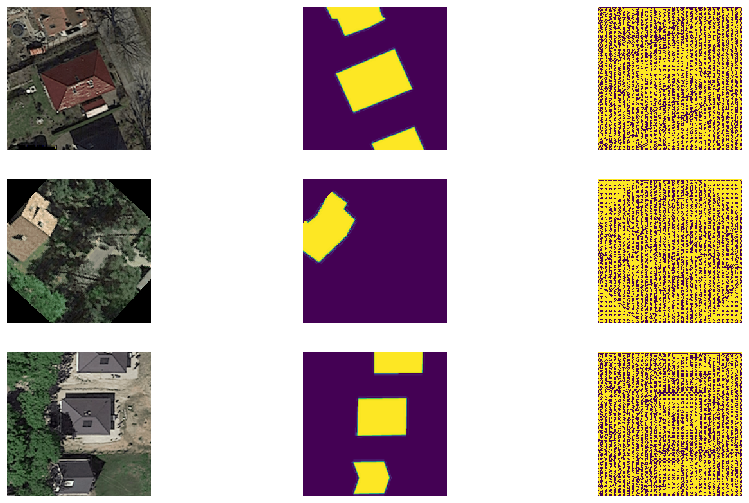

In [3]:
model = unet.get_model(input_shape=(224, 224, 3), output_channels=1, output_act=None)

util.show_predictions(train, model, num=3)

## Train model

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train for 3 steps, validate for 1 steps
Epoch 1/100
2/3 [===================>..........] - ETA: 3s - loss: 1.0540 - accuracy: 0.4804 

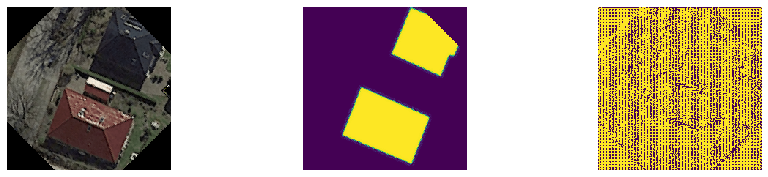

3/3 [==============================] - 10s 3s/step - loss: 1.0418 - accuracy: 0.4852 - val_loss: 0.9202 - val_accuracy: 0.5159
Epoch 2/100
3/3 [==============================] - 2s 676ms/step - loss: 0.9783 - accuracy: 0.5157 - val_loss: 0.8761 - val_accuracy: 0.5378
Epoch 3/100
3/3 [==============================] - 2s 676ms/step - loss: 0.9046 - accuracy: 0.5344 - val_loss: 0.8337 - val_accuracy: 0.5620
Epoch 4/100
3/3 [==============================] - 2s 661ms/step - loss: 0.8504 - accuracy: 0.5687 - val_loss: 0.7937 - val_accuracy: 0.5886
Epoch 5/100
3/3 [==============================] - 2s 676ms/step - loss: 0.7898 - accuracy: 0.6246 - val_loss: 0.7563 - val_accuracy: 0.6170
Epoch 6/100
3/3 [==============================] - 2s 671ms/step - loss: 0.7485 - accuracy: 0.6560 - val_loss: 0.7223 - val_accuracy: 0.6479
Epoch 7/100
3/3 [==============================] - 2s 672ms/step - loss: 0.6919 - accuracy: 0.6968 - val_loss: 0.6914 - val_accuracy: 0.6734
Epoch 8/100
3/3 [==========

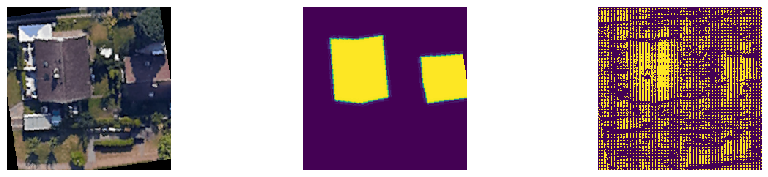

3/3 [==============================] - 3s 896ms/step - loss: 0.5244 - accuracy: 0.8055 - val_loss: 0.5915 - val_accuracy: 0.7492
Epoch 12/100
3/3 [==============================] - 2s 662ms/step - loss: 0.4943 - accuracy: 0.8142 - val_loss: 0.5770 - val_accuracy: 0.7642
Epoch 13/100
3/3 [==============================] - 2s 656ms/step - loss: 0.4552 - accuracy: 0.8566 - val_loss: 0.5662 - val_accuracy: 0.7759
Epoch 14/100
3/3 [==============================] - 2s 661ms/step - loss: 0.4465 - accuracy: 0.8312 - val_loss: 0.5575 - val_accuracy: 0.7847
Epoch 15/100
3/3 [==============================] - 2s 662ms/step - loss: 0.4377 - accuracy: 0.8253 - val_loss: 0.5493 - val_accuracy: 0.7919
Epoch 16/100
3/3 [==============================] - 2s 656ms/step - loss: 0.4005 - accuracy: 0.8561 - val_loss: 0.5399 - val_accuracy: 0.7989
Epoch 17/100
3/3 [==============================] - 2s 660ms/step - loss: 0.4000 - accuracy: 0.8379 - val_loss: 0.5299 - val_accuracy: 0.8049
Epoch 18/100
3/3 [=

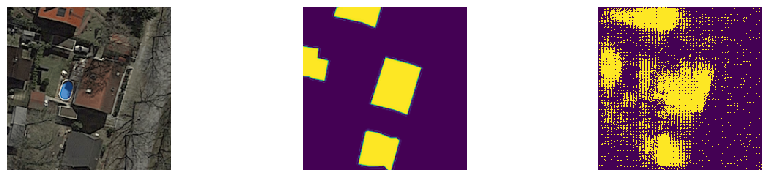

3/3 [==============================] - 3s 890ms/step - loss: 0.3318 - accuracy: 0.8734 - val_loss: 0.4887 - val_accuracy: 0.8192
Epoch 22/100
3/3 [==============================] - 2s 664ms/step - loss: 0.3243 - accuracy: 0.8834 - val_loss: 0.4751 - val_accuracy: 0.8235
Epoch 23/100
3/3 [==============================] - 2s 669ms/step - loss: 0.3169 - accuracy: 0.8725 - val_loss: 0.4635 - val_accuracy: 0.8273
Epoch 24/100
3/3 [==============================] - 2s 669ms/step - loss: 0.3118 - accuracy: 0.8645 - val_loss: 0.4496 - val_accuracy: 0.8317
Epoch 25/100
3/3 [==============================] - 2s 660ms/step - loss: 0.2902 - accuracy: 0.8837 - val_loss: 0.4418 - val_accuracy: 0.8340
Epoch 26/100
3/3 [==============================] - 2s 675ms/step - loss: 0.2906 - accuracy: 0.8809 - val_loss: 0.4401 - val_accuracy: 0.8330
Epoch 27/100
3/3 [==============================] - 2s 660ms/step - loss: 0.2853 - accuracy: 0.8727 - val_loss: 0.4405 - val_accuracy: 0.8316
Epoch 28/100
3/3 [=

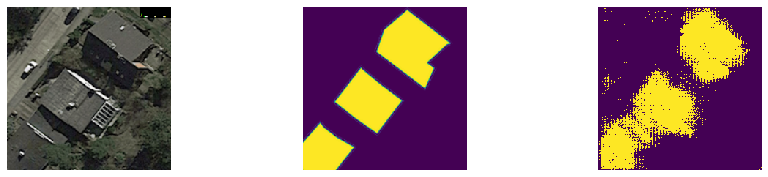

3/3 [==============================] - 3s 898ms/step - loss: 0.2697 - accuracy: 0.8692 - val_loss: 0.3999 - val_accuracy: 0.8404
Epoch 32/100
3/3 [==============================] - 2s 663ms/step - loss: 0.2395 - accuracy: 0.9075 - val_loss: 0.3907 - val_accuracy: 0.8421
Epoch 33/100
3/3 [==============================] - 2s 666ms/step - loss: 0.2747 - accuracy: 0.8572 - val_loss: 0.3792 - val_accuracy: 0.8456
Epoch 34/100
3/3 [==============================] - 2s 655ms/step - loss: 0.2411 - accuracy: 0.8835 - val_loss: 0.3712 - val_accuracy: 0.8482
Epoch 35/100
3/3 [==============================] - 2s 651ms/step - loss: 0.2466 - accuracy: 0.8774 - val_loss: 0.3682 - val_accuracy: 0.8493
Epoch 36/100
3/3 [==============================] - 2s 657ms/step - loss: 0.2425 - accuracy: 0.8819 - val_loss: 0.3611 - val_accuracy: 0.8513
Epoch 37/100
3/3 [==============================] - 2s 667ms/step - loss: 0.2420 - accuracy: 0.8674 - val_loss: 0.3560 - val_accuracy: 0.8521
Epoch 38/100
3/3 [=

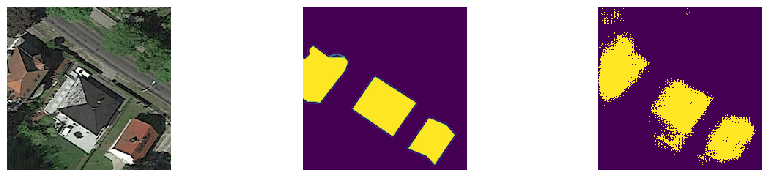

3/3 [==============================] - 3s 884ms/step - loss: 0.2238 - accuracy: 0.8765 - val_loss: 0.3462 - val_accuracy: 0.8492
Epoch 42/100
3/3 [==============================] - 2s 666ms/step - loss: 0.2137 - accuracy: 0.9022 - val_loss: 0.3412 - val_accuracy: 0.8502
Epoch 43/100
3/3 [==============================] - 2s 654ms/step - loss: 0.2075 - accuracy: 0.8966 - val_loss: 0.3360 - val_accuracy: 0.8513
Epoch 44/100
3/3 [==============================] - 2s 662ms/step - loss: 0.2113 - accuracy: 0.8871 - val_loss: 0.3380 - val_accuracy: 0.8503
Epoch 45/100
3/3 [==============================] - 2s 675ms/step - loss: 0.2070 - accuracy: 0.8832 - val_loss: 0.3401 - val_accuracy: 0.8490
Epoch 46/100
3/3 [==============================] - 2s 668ms/step - loss: 0.2057 - accuracy: 0.8976 - val_loss: 0.3358 - val_accuracy: 0.8501
Epoch 47/100
3/3 [==============================] - 2s 650ms/step - loss: 0.1979 - accuracy: 0.8937 - val_loss: 0.3227 - val_accuracy: 0.8533
Epoch 48/100
3/3 [=

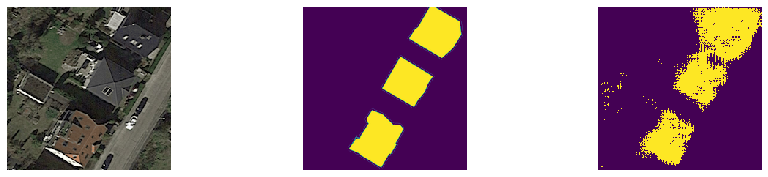

3/3 [==============================] - 3s 887ms/step - loss: 0.2022 - accuracy: 0.8807 - val_loss: 0.2909 - val_accuracy: 0.8594
Epoch 52/100
3/3 [==============================] - 2s 675ms/step - loss: 0.1890 - accuracy: 0.8972 - val_loss: 0.2872 - val_accuracy: 0.8601
Epoch 53/100
3/3 [==============================] - 2s 663ms/step - loss: 0.1808 - accuracy: 0.9038 - val_loss: 0.2807 - val_accuracy: 0.8613
Epoch 54/100
3/3 [==============================] - 2s 659ms/step - loss: 0.1963 - accuracy: 0.8783 - val_loss: 0.2710 - val_accuracy: 0.8628
Epoch 55/100
3/3 [==============================] - 2s 665ms/step - loss: 0.1711 - accuracy: 0.9087 - val_loss: 0.2634 - val_accuracy: 0.8633
Epoch 56/100
3/3 [==============================] - 2s 655ms/step - loss: 0.1954 - accuracy: 0.8786 - val_loss: 0.2596 - val_accuracy: 0.8638
Epoch 57/100
3/3 [==============================] - 2s 664ms/step - loss: 0.1739 - accuracy: 0.8950 - val_loss: 0.2594 - val_accuracy: 0.8639
Epoch 58/100
3/3 [=

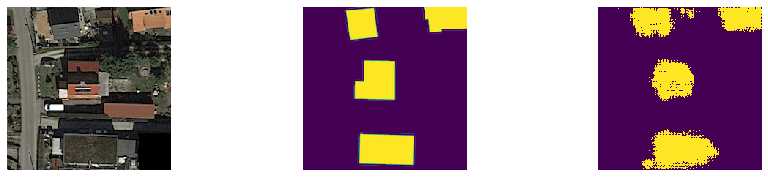

3/3 [==============================] - 3s 938ms/step - loss: 0.1644 - accuracy: 0.9086 - val_loss: 0.2599 - val_accuracy: 0.8621
Epoch 62/100
3/3 [==============================] - 2s 752ms/step - loss: 0.1871 - accuracy: 0.8778 - val_loss: 0.2658 - val_accuracy: 0.8617
Epoch 63/100
3/3 [==============================] - 2s 777ms/step - loss: 0.1591 - accuracy: 0.9115 - val_loss: 0.2707 - val_accuracy: 0.8605
Epoch 64/100
3/3 [==============================] - 2s 746ms/step - loss: 0.1567 - accuracy: 0.9137 - val_loss: 0.2699 - val_accuracy: 0.8610
Epoch 65/100
3/3 [==============================] - 2s 753ms/step - loss: 0.1621 - accuracy: 0.9103 - val_loss: 0.2626 - val_accuracy: 0.8627
Epoch 66/100
3/3 [==============================] - 2s 735ms/step - loss: 0.1562 - accuracy: 0.9035 - val_loss: 0.2529 - val_accuracy: 0.8647
Epoch 67/100
3/3 [==============================] - 2s 715ms/step - loss: 0.1578 - accuracy: 0.9016 - val_loss: 0.2462 - val_accuracy: 0.8659
Epoch 68/100
3/3 [=

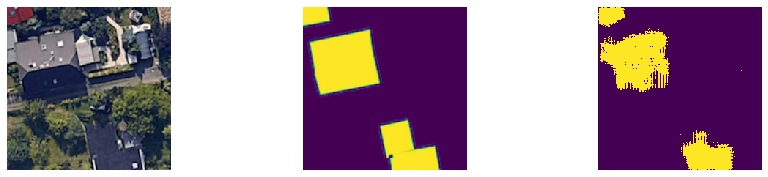

3/3 [==============================] - 3s 975ms/step - loss: 0.1436 - accuracy: 0.9298 - val_loss: 0.2254 - val_accuracy: 0.8669
Epoch 72/100
3/3 [==============================] - 2s 762ms/step - loss: 0.1431 - accuracy: 0.9130 - val_loss: 0.2199 - val_accuracy: 0.8673
Epoch 73/100
3/3 [==============================] - 2s 757ms/step - loss: 0.1532 - accuracy: 0.8973 - val_loss: 0.2157 - val_accuracy: 0.8691
Epoch 74/100
3/3 [==============================] - 2s 734ms/step - loss: 0.1353 - accuracy: 0.9219 - val_loss: 0.2114 - val_accuracy: 0.8710
Epoch 75/100
3/3 [==============================] - 2s 706ms/step - loss: 0.1554 - accuracy: 0.8971 - val_loss: 0.2098 - val_accuracy: 0.8715
Epoch 76/100
3/3 [==============================] - 2s 727ms/step - loss: 0.1449 - accuracy: 0.9069 - val_loss: 0.2109 - val_accuracy: 0.8732
Epoch 77/100
3/3 [==============================] - 2s 756ms/step - loss: 0.1434 - accuracy: 0.9074 - val_loss: 0.2116 - val_accuracy: 0.8731
Epoch 78/100
3/3 [=

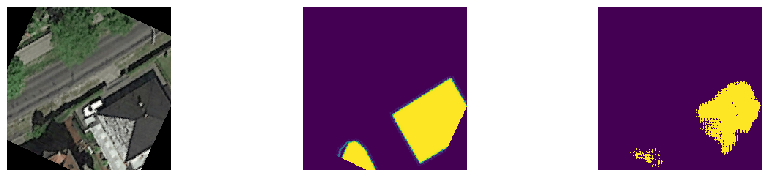

3/3 [==============================] - 3s 980ms/step - loss: 0.1553 - accuracy: 0.8947 - val_loss: 0.2089 - val_accuracy: 0.8665
Epoch 82/100
3/3 [==============================] - 2s 738ms/step - loss: 0.1408 - accuracy: 0.9137 - val_loss: 0.2091 - val_accuracy: 0.8616
Epoch 83/100
3/3 [==============================] - 2s 726ms/step - loss: 0.1318 - accuracy: 0.9174 - val_loss: 0.2067 - val_accuracy: 0.8611
Epoch 84/100
3/3 [==============================] - 2s 727ms/step - loss: 0.1348 - accuracy: 0.9191 - val_loss: 0.2033 - val_accuracy: 0.8629
Epoch 85/100
3/3 [==============================] - 2s 782ms/step - loss: 0.1276 - accuracy: 0.9171 - val_loss: 0.2005 - val_accuracy: 0.8653
Epoch 86/100
3/3 [==============================] - 2s 753ms/step - loss: 0.1458 - accuracy: 0.9043 - val_loss: 0.1990 - val_accuracy: 0.8666
Epoch 87/100
3/3 [==============================] - 2s 763ms/step - loss: 0.1357 - accuracy: 0.9127 - val_loss: 0.1981 - val_accuracy: 0.8667
Epoch 88/100
3/3 [=

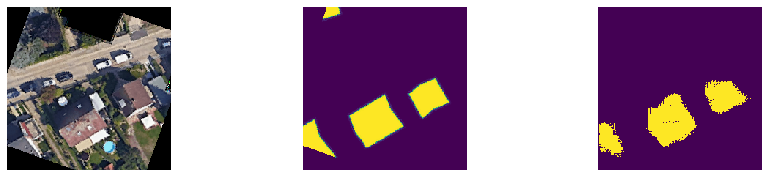

3/3 [==============================] - 3s 997ms/step - loss: 0.1243 - accuracy: 0.9162 - val_loss: 0.2003 - val_accuracy: 0.8676
Epoch 92/100
3/3 [==============================] - 2s 776ms/step - loss: 0.1283 - accuracy: 0.9108 - val_loss: 0.1990 - val_accuracy: 0.8663
Epoch 93/100
3/3 [==============================] - 2s 737ms/step - loss: 0.1195 - accuracy: 0.9173 - val_loss: 0.1988 - val_accuracy: 0.8643
Epoch 94/100
3/3 [==============================] - 2s 749ms/step - loss: 0.1180 - accuracy: 0.9232 - val_loss: 0.1980 - val_accuracy: 0.8642
Epoch 95/100
3/3 [==============================] - 2s 715ms/step - loss: 0.1251 - accuracy: 0.9207 - val_loss: 0.1985 - val_accuracy: 0.8642
Epoch 96/100
3/3 [==============================] - 2s 732ms/step - loss: 0.1366 - accuracy: 0.9066 - val_loss: 0.1993 - val_accuracy: 0.8629
Epoch 97/100
3/3 [==============================] - 2s 736ms/step - loss: 0.1292 - accuracy: 0.9129 - val_loss: 0.1998 - val_accuracy: 0.8627
Epoch 98/100
3/3 [=

In [4]:
epochs = 100
steps_per_epoch = nb_train // batch_size
val_steps = nb_val // batch_size

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

callbacks = [util.DisplayCallback(train, model, intv=10)]
history = model.fit(train,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,                              
                    validation_data=val,
                    validation_steps=val_steps,
                    callbacks=callbacks)

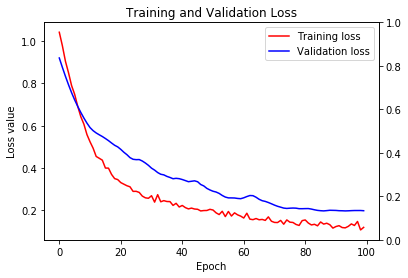

In [5]:
util.show_model_history(history, epochs)

## Evaluate predictions

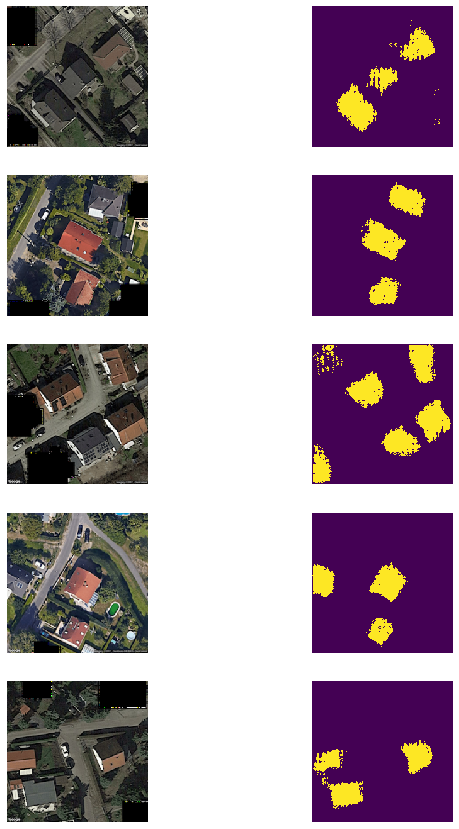

In [6]:
test, nb_test = data.get_test_dataset(data_dir)
util.show_predictions(test, model, num=nb_test)